

# Projeto 3 - Ciência dos dados 

###### Nomes: Gustavo, Matheus, Pedro Carani e Thiago David

# Modelo preditivo do indíce Ibovespa baseado no próprio indíce.




### A pergunta que nosso modelo tenta responder é: 


# É possível prever o indíce baseado no passado? 

In [2]:
#Escrever um texto explicando a motivacao do trabalho 

## Referências:

    - Montgomery. Cap 11, pág 333.
    -https://scikit-learn.org/stable/modules/generated/sklearn.metrics.explained_variance_score.html#sklearn.metrics.explained_variance_score
    -https://scikit-learn.org/stable/modules/model_evaluation.html

## Regressão Linear


 
A regressão linear é um método de ajuste de reta dos dados que estão sendo considerados, e pode ser calculado de acordo com a seguinte fórmula: $y_i=\beta_0+\beta_1x_i+\epsilon_i$. Também, ajuda na procura por padrões e anomalias desses dados.  Primeiro, para fazer uma regressão linear, é necessário achar os coeficientes $\beta_0$ e $\beta_1$.

Para achar o $\beta_0$ nós usamos a seguinte fórmula:

$$\beta_0=\bar{y}-\beta_1\bar{x}$$

E para achar o $\beta_1$ usamos a seguinte fórmula: $$\beta_1=\frac{S_{XY}}{S_{XX}}=\frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n(x_i-\bar{x})^2}$$

Após achar os coeficientes é necessário achar o vetor de resíduos através da fórmula: $\epsilon_i=y_i-(\beta_0+\beta_1x_i)$. Com os coeficientes e o vetor de resíduo já é possível a reta da regressão linear.
    

## Regressão linear em python

Para podermos usar a regressão linear no nosso projeto usamos as seguintes bibliotecas: sklearn.model_selection, sklearn.linear_model e sklearn.metrics. A primeira foi usada para separar os dados para teste com proporção de 20% dos dados. A segunda biblioteca foi usada para calcular a reta da regressão linear; no comando usado já foi calculado todos os coeficientes e vetor de resíduo. A terceira biblioteca foi usada para se calcular o coeficiente de determinação.  

## Sobre o nosso Modelo:


 ### Os dados foram coletados do site https://finance.yahoo.com/:

     - Ibovespa (2018-2019)
     
     
     
     
   

## Qual variável explicativa vai ser utilizada?

#### A variável explicativa a ser utilzada no modelo será o valor do índice ibovespa anterior.

In [4]:
#explicar melhor 

## Nosso modelo:

## Importando bibliotecas: 

In [5]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
from scipy.stats import norm 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import seaborn as sns


## Lendo os arquivos de dados:

In [6]:
ibov=pd.read_csv("bov.csv")

# Análise exploratória dos dados:

## Dados do Ibovespa

In [7]:
ibov.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-11-08,87719.0,88570.0,85620.0,85620.0,85620.0,5297700
1,2018-11-09,85620.0,86233.0,84030.0,85641.0,85641.0,4814400
2,2018-11-12,85644.0,86227.0,85009.0,85525.0,85525.0,3534000
3,2018-11-13,85531.0,85941.0,84071.0,84914.0,84914.0,4410700
4,2018-11-14,84898.0,85973.0,84267.0,85973.0,85973.0,5591600


## Vamos analisar apenas os dados de fechamento

In [8]:
ibov["Close"]

0       85620.000000
1       85641.000000
2       85525.000000
3       84914.000000
4       85973.000000
5       88515.000000
6       87901.000000
7       87269.000000
8       87477.000000
9       86230.000000
10      85547.000000
11      87891.000000
12      89251.000000
13      89710.000000
14      89504.000000
15      89820.000000
16      88624.000000
17      89040.000000
18      88846.000000
19      88115.000000
20      85915.000000
21      86420.000000
22      86977.000000
23      87838.000000
24      87450.000000
25      86400.000000
26      86610.000000
27      85674.000000
28      85269.000000
29      85697.000000
           ...      
219    104745.000000
220    104053.000000
221    101031.000000
222    101516.000000
223    102551.000000
224    100573.000000
225     99981.000000
226    101249.000000
227    101817.000000
228    103832.000000
229    104302.000000
230    104490.000000
231    105423.000000
232    105016.000000
233    104729.000000
234    106022.000000
235    107381

## Criando um novo Dataset com apenas as informações necessárias (fechamento) para a análise:

In [9]:
ibov=pd.DataFrame(ibov, columns=['Date','Close'])


## Dataset do Ibovespa para o modelo:

In [10]:
ibov.head()

,Date,Close
0,2018-11-08,85620.0
1,2018-11-09,85641.0
2,2018-11-12,85525.0
3,2018-11-13,84914.0
4,2018-11-14,85973.0


## Separando os dados:

In [11]:
date=ibov['Date']
pontos=ibov['Close']


## Boxplot do índice Ibovespa


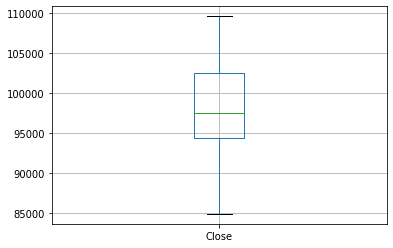

In [12]:
ibov.boxplot();


In [13]:
#texto sobre o boxplot

## Histograma do Ibovespa

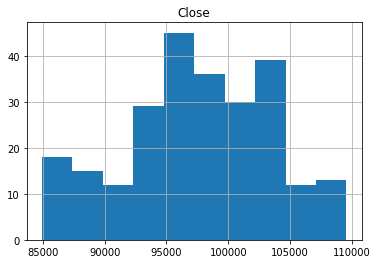

In [14]:
ibov.hist();

Pelo histograma, é possivel analisar que as maiorias dos dados se encontram entre 95.000 pontos a 100.000 pontos.

## Gráfico do Ibovespa durante os anos de 2018 e 2019.

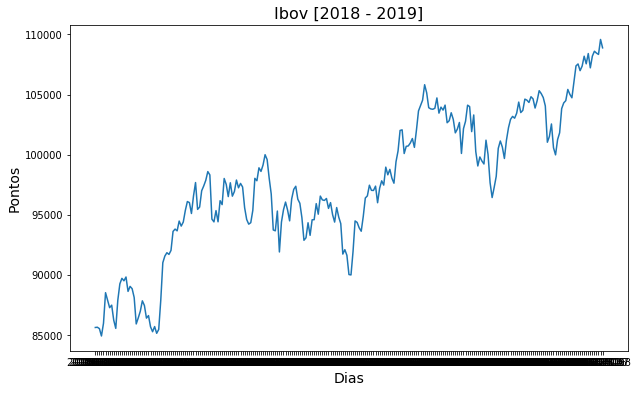

In [15]:
plt.figure(1, figsize=(10,6))
plt.plot(date, pontos)
plt.title('Ibov [2018 - 2019]', fontsize=16)
plt.xlabel('Dias', fontsize=14)
plt.ylabel('Pontos', fontsize=14)
plt.show();



## Modelo (((EM CONSTRUCAO))): 

## Criando um dataset com o Índice Ibov anterior:

In [16]:
lista = np.array(pontos)
lista=lista[1:]
ibov_anterior=pd.DataFrame(lista)




ibov_novo=ibov.join(ibov_anterior, lsuffix='_caller', rsuffix='_other')
ibovespa=ibov_novo.rename(columns={"Close": "Fechamento anterior", 0: "Fechamento"})
ibovespa=ibovespa.dropna()
ibovespa.head()


,Date,Fechamento anterior,Fechamento
0,2018-11-08,85620.0,85641.0
1,2018-11-09,85641.0,85525.0
2,2018-11-12,85525.0,84914.0
3,2018-11-13,84914.0,85973.0
4,2018-11-14,85973.0,88515.0


In [17]:
anterior=ibovespa["Fechamento anterior"]
fechamento=ibovespa["Fechamento"]

ibovespa.corr()

,Fechamento anterior,Fechamento
Fechamento anterior,1.000000,0.981372
Fechamento,0.981372,1.000000


### Separar dados para treinamento e teste

Aqui é separado os dados de teste e os dados para treinamento, os dados dados foram separados na seguinte proporção: 20% para teste e 80% para treinamento


In [18]:
train, test = train_test_split(ibovespa, test_size=0.20)

In [19]:
train.head()

,Date,Fechamento anterior,Fechamento
118,2019-05-08,95597.0,94808.0
244,2019-11-04,108601.0,108451.0
82,2019-03-15,99137.0,99994.0
144,2019-06-13,98774.0,98040.0
2,2018-11-12,85525.0,84914.0


Aqui é separado a variável explicativa e a preditiva, sendo o x a explicativa e o y a preditiva.


In [20]:
X_train = np.array(train["Fechamento anterior"]).reshape(-1, 1)
y_train = train['Fechamento']

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

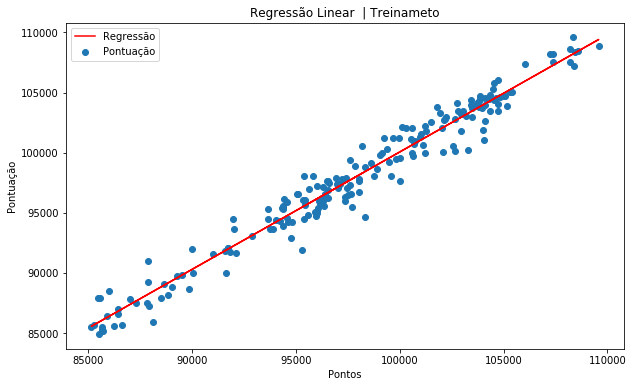

In [22]:
plt.figure(1, figsize=(10,6))
plt.title('Regressão Linear  | Treinameto' )
plt.scatter(X_train, y_train, label='Pontuação')
plt.plot(X_train, y_pred, color='r', label='Regressão')
plt.xlabel('Pontos')
plt.ylabel('Pontuação')
plt.legend()
plt.show()

In [23]:
X_test = np.array(test["Fechamento anterior"]).reshape(-1, 1)
y_test = test['Fechamento']
y_pred = model.predict(X_test)

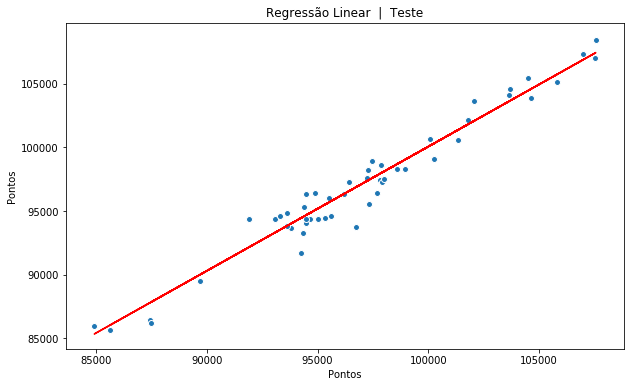

In [24]:
plt.figure(1, figsize=(10,6))
plt.title('Regressão Linear  |  Teste')
plt.plot(X_test,y_pred , color='r', label='Regressão')
plt.scatter(X_test, y_test, edgecolor='w', label='Pontos')
plt.xlabel('Pontos')
plt.ylabel('Pontos')

plt.show()


In [25]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)


0.9573985370599413

# Análise dos resíduos 

In [26]:
#fazer uma analise melhor!

In [27]:
e=y_test-y_pred

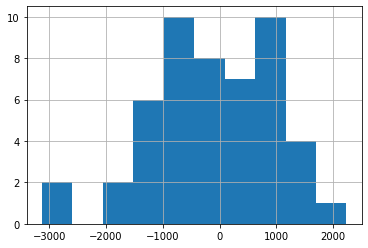

In [28]:
e.hist();

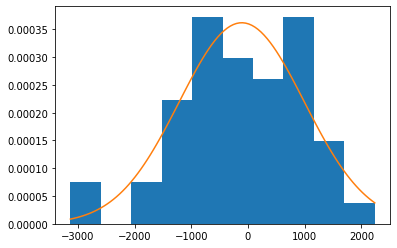

In [29]:
from scipy.stats import norm

mu, std = norm.fit(e)
        
x = np.linspace(min(e), max(e), 100)
p = norm.pdf(x, mu, std)
plt.hist(e, density=True)

plt.plot(x, p)
plt.show()




In [30]:
ibovespa['Predição'] = model.predict(np.array(ibovespa["Fechamento"]).reshape(-1, 1))

In [31]:
ibovespa.head()

,Date,Fechamento anterior,Fechamento,Predição
0,2018-11-08,85620.0,85641.0,86041.981403
1,2018-11-09,85641.0,85525.0,85928.758972
2,2018-11-12,85525.0,84914.0,85332.389101
3,2018-11-13,84914.0,85973.0,86366.031807
4,2018-11-14,85973.0,88515.0,88847.164724


In [32]:
from sklearn import metrics

In [33]:
ibovespa['Fechamento'].describe()

count       248.000000
mean      97643.797222
std        5878.983045
min       84914.000000
25%       94392.000000
50%       97462.000000
75%      102577.000000
max      109581.000000
Name: Fechamento, dtype: float64

## R²

In [34]:
metrics.r2_score(y_test, y_pred)

0.9569802765059804